### All modifications - repeat 10 times

This experiment involves the default setup for all the parameters, however with the reduced dataset size to 15000, as explained in the write up. The expeirment is repeated 10 times, and here, we are interested in measurement consistency, i.e. throughput dispersion between different experiments. 
Also, we consider two different execution environments, IARAI and TU.

In [1]:
from benchmarking.analysis.analyze_results import *

In [2]:
# dataset size
samples = 15000

Data loading function:

In [3]:
def load_all_experiments(output_base_folder, base_folder):
    results_scratch = []
    results_s3 = []
    for folder_index in range(1, 11):
        print(f"Working with {folder_index}")
        s3_folder_filter= base_folder + str(folder_index) + "/s3/*benchmark_e2e*"
        scratch_folder_filter= base_folder + str(folder_index) + "/scratch/*benchmark_e2e*"

        # read data
        df_dataloader_s3 = extract_timelines(output_base_folder, folder_filter=s3_folder_filter)
        df_dataloader_scratch = extract_timelines(output_base_folder, folder_filter=scratch_folder_filter)

        # Get unique functions 
        unique_functions_scratch = np.unique(df_dataloader_scratch["item_x"])
        print(f"Unique functions: {unique_functions_scratch}")

        unique_runs_scratch = np.unique(df_dataloader_scratch["run"])
        unique_runs_s3 = np.unique(df_dataloader_s3["run"])

        # extract GPU UTIL
        df_gpuutil_scratch = extract_gpuutil(output_base_folder, folder_filter=scratch_folder_filter)
        unique_runs_scratch = np.unique(df_dataloader_scratch["run"])

        df_gpuutil_s3 = extract_gpuutil(output_base_folder, folder_filter=s3_folder_filter)
        unique_runs_s3 = np.unique(df_dataloader_s3["run"])

        # Get data for scratch
        returns_scratch = []
        for run in sorted(unique_runs_scratch):
            df = df_dataloader_scratch[df_dataloader_scratch["run"]==run]
            dfgpu = df_gpuutil_scratch[df_gpuutil_scratch["run"]==run]
            returns_scratch.append(get_gpu_stats(df, dfgpu, run, False, True, False, 2))
        result = pd.DataFrame.from_records(data=returns_scratch)
        result["throughput"] = samples / result["runtime"]
        results_scratch.append(result)

        # Get data for S3
        returns_s3 = []
        for run in sorted(unique_runs_s3):
            df = df_dataloader_s3[df_dataloader_s3["run"]==run]
            dfgpu = df_gpuutil_s3[df_gpuutil_s3["run"]==run]
            returns_s3.append(get_gpu_stats(df, dfgpu, run, False, True, False, 2))
        result = pd.DataFrame.from_records(data=returns_s3)
        result["throughput"] = samples / result["runtime"]
        results_s3.append(result)
    return results_s3, results_scratch

In [4]:
impls = ["threaded", "asyncio", "vanilla"]
libs = ["torch", "lightning"]

In [5]:
def add_stats(throughputs):
    df = throughputs.T

    mean = df.mean(axis=1)
    var = df.var(axis=1)
    std = df.std(axis=1)

    df["mean"] = mean.round(2)
    df["var"] = var.round(2)
    df["std"] = std.round(2)
    return df

### TU environment

In [6]:
# setup folders
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking-raw/repeated-runs-0212/tu")
base_folder = "0212_run_"

# Load data
results_s3, results_scratch = load_all_experiments(output_base_folder, base_folder)

Working with 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 265.07it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 335.42it/s]


Working with 2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 239.61it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 402.84it/s]


Working with 3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 258.70it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 323.51it/s]


Working with 4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 272.14it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 321.04it/s]


Working with 5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 267.99it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 325.29it/s]


Working with 6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 269.68it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 335.09it/s]


Working with 7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 271.68it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 329.26it/s]


Working with 8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 269.41it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 357.19it/s]


Working with 9


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 269.34it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 354.02it/s]


Working with 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 269.21it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 412.44it/s]


In [7]:
# Check the sizes
print(f"Experiments loaded ... S3: {len(results_s3)}, Scratch: {len(results_scratch)}")

Experiments loaded ... S3: 10, Scratch: 10


In [8]:
throughput_all_s3 = plot_all_histograms(results_s3, impls, libs, False) # display = False (doesn't plot histogrms)

In [9]:
throughput_all_scratch = plot_all_histograms(results_scratch, impls, libs, False) # display = False (doesn't plot histogrms)

In [10]:
df_t_s3 = add_stats(throughput_all_s3)
df_t_s3

,0,1,2,3,4,5,6,7,8,9,mean,var,std
threaded_torch,39.93,43.13,38.31,36.25,36.86,36.35,36.64,36.34,36.44,36.04,37.63,5.19,2.28
threaded_lightning,38.51,40.56,38.52,35.43,36.12,35.77,36.51,36.30,36.30,36.01,37.00,2.69,1.64
asyncio_torch,38.55,39.31,38.13,34.56,34.50,35.02,34.64,34.91,35.13,34.91,35.97,3.58,1.89
asyncio_lightning,38.86,38.22,37.34,35.80,35.22,34.80,35.58,35.25,35.71,35.56,36.23,1.94,1.39
vanilla_torch,4.04,3.89,3.73,3.84,3.83,3.96,4.03,4.11,4.06,4.09,3.96,0.02,0.13
vanilla_lightning,0.91,0.93,0.94,0.96,0.96,0.99,1.01,1.01,1.01,0.96,0.97,0.00,0.04


In [11]:
df_t_scratch = add_stats(throughput_all_scratch)
df_t_scratch

,0,1,2,3,4,5,6,7,8,9,mean,var,std
threaded_torch,76.59,77.64,81.78,81.74,82.01,82.21,84.56,83.06,82.49,84.80,81.69,7.02,2.65
threaded_lightning,51.55,51.35,53.23,52.26,52.69,51.68,52.30,52.09,52.59,52.40,52.21,0.33,0.57
asyncio_torch,80.49,81.50,84.39,81.55,82.56,82.29,81.16,81.06,82.02,80.90,81.79,1.25,1.12
asyncio_lightning,52.48,52.48,51.48,52.56,51.83,51.62,52.04,52.25,51.85,51.81,52.04,0.15,0.38
vanilla_torch,51.18,55.06,56.17,56.29,56.09,56.32,56.44,55.56,55.95,56.25,55.53,2.51,1.58
vanilla_lightning,14.23,15.46,15.59,15.71,15.58,15.69,15.45,15.50,15.62,15.58,15.44,0.19,0.43


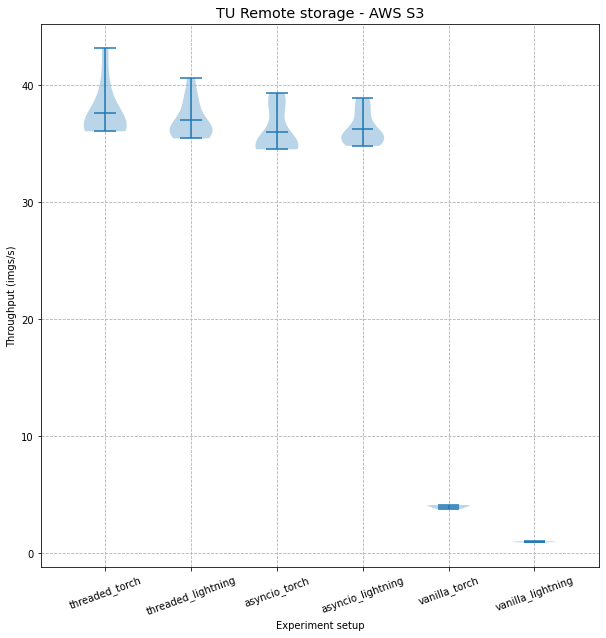

In [12]:
plot_violins(df_t_s3, "TU Remote storage - AWS S3")

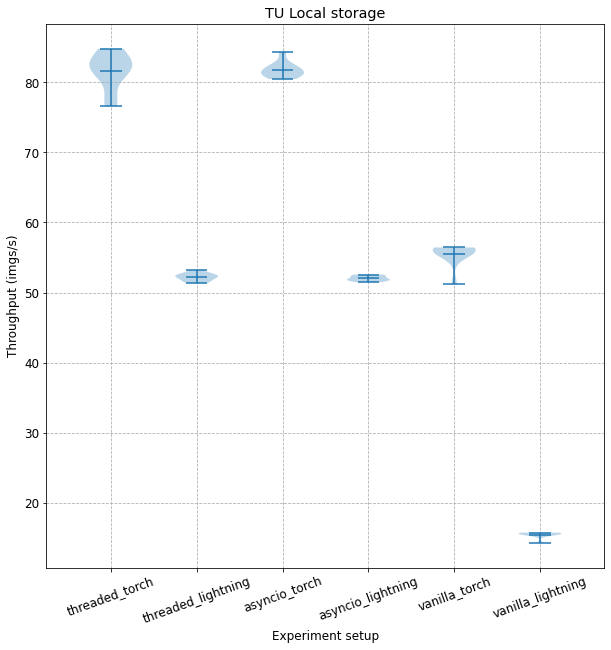

In [13]:
plot_violins(df_t_scratch, "TU Local storage")

### IARAI environment

In [14]:
# setup folders
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking-raw/repeated-runs-0212/iarai")
base_folder = "0212_run_"

# Load data
results_s3, results_scratch = load_all_experiments(output_base_folder, base_folder)

Working with 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 271.97it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 447.59it/s]


Working with 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 252.28it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 451.02it/s]


Working with 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 271.27it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 480.14it/s]


Working with 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 271.75it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 490.73it/s]


Working with 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 272.11it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 568.31it/s]


Working with 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 254.66it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 567.87it/s]


Working with 7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 274.71it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 492.02it/s]


Working with 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 269.54it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 502.24it/s]


Working with 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 271.53it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 516.01it/s]


Working with 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 269.69it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 639.43it/s]


In [15]:
# Check the sizes
print(f"Experiments loaded ... S3: {len(results_s3)}, Scratch: {len(results_scratch)}")

Experiments loaded ... S3: 10, Scratch: 10


In [16]:
throughput_all_s3 = plot_all_histograms(results_s3, impls, libs, False) # display = False (doesn't plot histogrms)

In [17]:
throughput_all_scratch = plot_all_histograms(results_scratch, impls, libs, False) # display = False (doesn't plot histogrms)

In [18]:
df_t_s3 = add_stats(throughput_all_s3)
df_t_s3

,0,1,2,3,4,5,6,7,8,9,mean,var,std
threaded_torch,25.48,29.45,26.36,27.06,29.61,25.91,26.31,28.07,27.63,26.45,27.23,2.06,1.43
threaded_lightning,31.14,28.14,29.40,29.14,29.39,28.10,28.53,28.90,28.71,28.08,28.95,0.84,0.92
asyncio_torch,30.05,28.56,25.65,27.75,28.58,26.94,27.10,28.30,28.54,27.13,27.86,1.48,1.22
asyncio_lightning,30.52,28.32,29.06,28.32,29.03,27.97,28.06,28.39,28.32,27.69,28.57,0.65,0.81
vanilla_torch,3.85,3.98,3.90,3.99,4.04,3.86,4.12,4.28,4.18,4.12,4.03,0.02,0.14
vanilla_lightning,0.89,0.90,0.94,0.97,0.96,0.98,1.00,1.03,1.00,0.99,0.97,0.00,0.04


In [19]:
df_t_scratch = add_stats(throughput_all_scratch)
df_t_scratch

,0,1,2,3,4,5,6,7,8,9,mean,var,std
threaded_torch,79.73,84.11,83.93,83.36,82.64,84.34,82.76,83.69,80.38,81.13,82.61,2.69,1.64
threaded_lightning,51.31,56.04,55.27,55.05,55.98,55.55,55.23,55.34,53.03,52.37,54.52,2.74,1.66
asyncio_torch,80.22,86.40,84.23,81.20,82.65,82.76,80.92,81.38,79.90,78.36,81.80,5.33,2.31
asyncio_lightning,53.74,55.26,53.92,54.73,55.83,54.12,52.88,52.73,54.14,52.32,53.97,1.25,1.12
vanilla_torch,57.03,55.45,57.37,57.23,56.51,54.57,55.93,55.48,55.24,54.47,55.93,1.13,1.06
vanilla_lightning,16.03,16.04,16.26,16.14,15.87,15.91,15.95,15.87,15.83,15.65,15.96,0.03,0.17


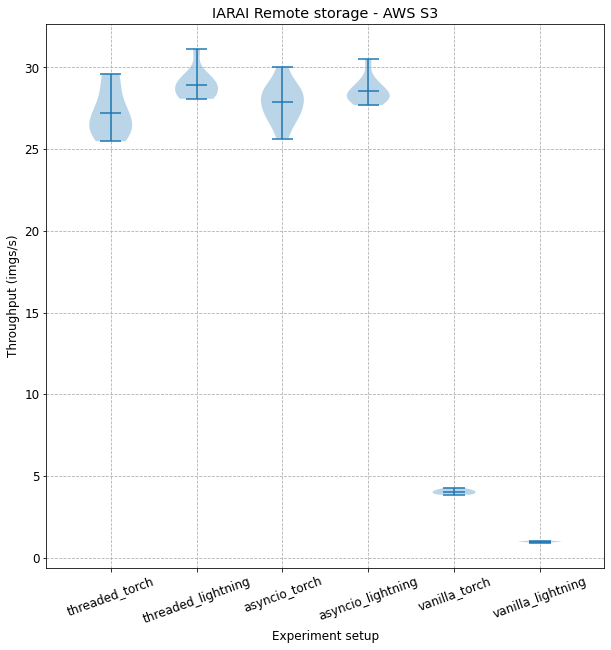

In [20]:
plot_violins(df_t_s3, "IARAI Remote storage - AWS S3")

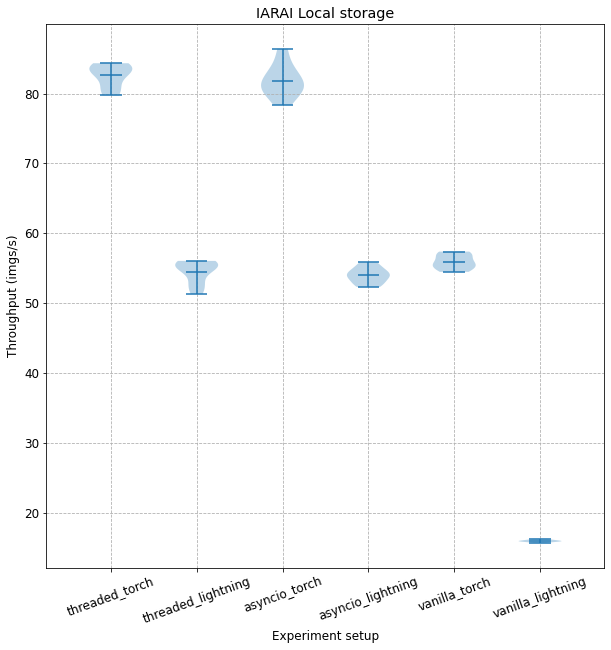

In [21]:
plot_violins(df_t_scratch, "IARAI Local storage")